# About the Dataset

This data set is created by __IBM Data Scientists.__

Our Aim is to __Analyse the factors towards Attrition.__

The dataset includes features like Age, Employee Role, Daily Rate, Job Satisfaction, Years At Company, Years In Current Role etc. 

## Importing all the required packages

In [1]:
import pandas as pd,numpy as np

# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()

# Clustering packages (for Predicting a label for the unsupervised data)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Model Building related packages for Classification (Supervised)
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)

# PCA package
from sklearn.decomposition import PCA

# Metrics

from sklearn import metrics

# import package to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
attrition = pd.read_csv("IBM-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [3]:
attrition.shape  

#The dataset has 1470 samples and 35 features

(1470, 35)

In [4]:
null_sum = attrition.isnull().sum()
null_sum[null_sum!=0]

# There are no null values present in the data

Series([], dtype: int64)

In [5]:
attrition.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


###### By the above description, we can see that mean and median are nearly same for all the features (except MonthlyIncome) and hence the outlier presence is less. Let's check with the box plot !!!

### Outlier checking and treating it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

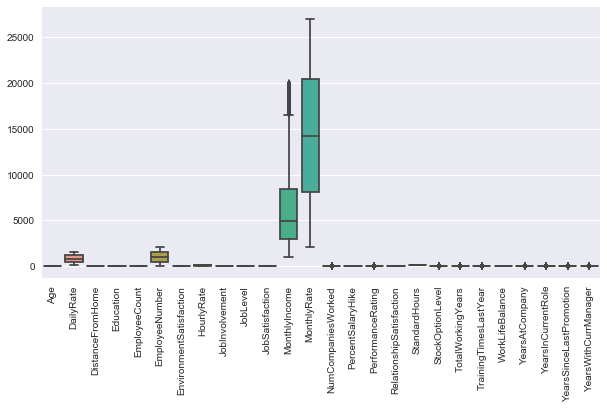

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)

# By looking the box plot, we can see that there are some outliers 
# in the "Monthly Income" Feature as we expected !!!

# Since, the outliers are not so far.. instead of removing the outliers, we can perform capping !!


In [7]:
# Let's find the upper range and lower range for the feature "MonthlyIncome"

Q_3 = attrition.MonthlyIncome.quantile(.75)
Q_1 = attrition.MonthlyIncome.quantile(.25)

IQR = Q_3 - Q_1

upper_range = Q_3 + 1.5 * IQR

lower_range = Q_3 - 1.5 * IQR

print("Upper Range:\t",upper_range)
print("\nLower Range:\t",lower_range)


Upper Range:	 16581.0

Lower Range:	 177.0


In [8]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# There are 114 samples has range greater than upper range. We can cap them

114

In [9]:
# Cap the outliers with the use of np.where function

# np.where(condition,new_data,Old_data)

attrition.MonthlyIncome = np.where(attrition.MonthlyIncome>upper_range,
                                                          upper_range,attrition.MonthlyIncome)

In [10]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# All the outliers are capped now. Let's check the box plot now

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

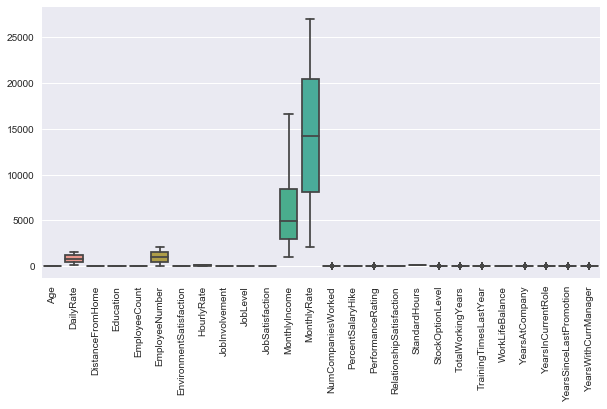

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)

# Now, there is no outliers

### Categorical (text) to Categorical (numerical) conversion

In [12]:
object_columns = list(attrition.select_dtypes(include="object").columns)

len(object_columns)

# So,There are totally 9 features which has categorical data in the form of text.
# We need to convert into numerical data

9

In [13]:
# This loop will give us the view that, if we use label encoder to convert the text to numerical
# data, what texts will be converted into what numbers. (Because when we use label encoder, it
# doesn't show which text converted to which numbers )

replace_values = {}
for i in object_columns:
    k=0
    temp=[]
    ab=list(attrition[i].unique())
    ab.sort()
    for j in ab:
        temp.append((j,k))
        k=k+1
    replace_values[i]=temp

replace_values        

{'Attrition': [('No', 0), ('Yes', 1)],
 'BusinessTravel': [('Non-Travel', 0),
  ('Travel_Frequently', 1),
  ('Travel_Rarely', 2)],
 'Department': [('Human Resources', 0),
  ('Research & Development', 1),
  ('Sales', 2)],
 'EducationField': [('Human Resources', 0),
  ('Life Sciences', 1),
  ('Marketing', 2),
  ('Medical', 3),
  ('Other', 4),
  ('Technical Degree', 5)],
 'Gender': [('Female', 0), ('Male', 1)],
 'JobRole': [('Healthcare Representative', 0),
  ('Human Resources', 1),
  ('Laboratory Technician', 2),
  ('Manager', 3),
  ('Manufacturing Director', 4),
  ('Research Director', 5),
  ('Research Scientist', 6),
  ('Sales Executive', 7),
  ('Sales Representative', 8)],
 'MaritalStatus': [('Divorced', 0), ('Married', 1), ('Single', 2)],
 'Over18': [('Y', 0)],
 'OverTime': [('No', 0), ('Yes', 1)]}

In [14]:
# Let's convert the text features into the numerical features by the use of LabelEncoder

le = LabelEncoder()
df_categorical = attrition.select_dtypes(include=['object'])
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0


In [15]:
#Remove the original categorical(text) features and add the numerically converted features

attrition_copy = pd.DataFrame(attrition) # For backup/Reference

for m in df_categorical.columns:
    attrition.drop(m,axis=1,inplace=True)

    
attrition=pd.concat([attrition,df_categorical],axis=1)
attrition.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


### Check the correlation matrix and find the strength

In [16]:
cor_df=pd.DataFrame(attrition.corr()["Attrition"])
cor_df["Absolute_Corr"]=abs(cor_df["Attrition"])
cor_df.sort_values(by="Absolute_Corr",ascending=False)

,Attrition,Absolute_Corr
Attrition,1.000000,1.000000
OverTime,0.246118,0.246118
TotalWorkingYears,-0.171063,0.171063
JobLevel,-0.169105,0.169105
MonthlyIncome,-0.164778,0.164778
MaritalStatus,0.162070,0.162070
YearsInCurrentRole,-0.160545,0.160545
Age,-0.159205,0.159205
YearsWithCurrManager,-0.156199,0.156199
StockOptionLevel,-0.137145,0.137145


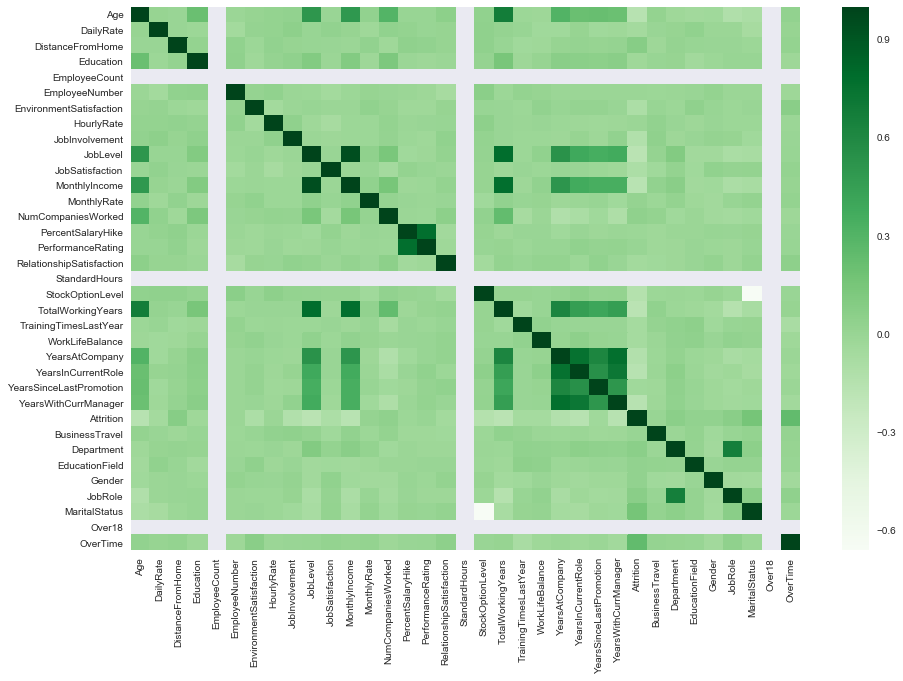

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(attrition.corr(),cmap="Greens")

##### By looking at the matrix, we can see that all the features has less significance towards the target feature

* The Feature "TotalWorkingYears" is highly correlated to "Job Level" (Long years we work, we will get high job level)


* Age is correlated to "JobLevel" and "Education" (As the age increases, our grade and Education level also increases)

In [18]:
# Let's convert the datatype of converted numerical columns to category

for k in df_categorical.columns:
    attrition[k]=attrition[k].astype("category")

attrition.select_dtypes(include="category").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

#### Let's check the Attrition rate with some features

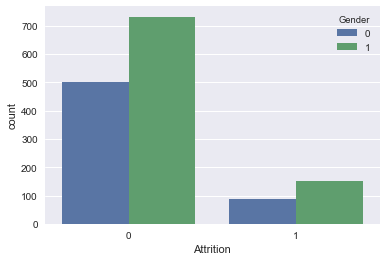

In [19]:
# Attrition vs Gender

sns.countplot(x="Attrition",data=attrition,hue="Gender")

# Gender : 0 - Female ; 1- Male

# Attrition : 0 - No ; 1- Yes

###### By the count plot, we can see the Attrition rate is high for males when compared to females and most of the employees are not changing the company.

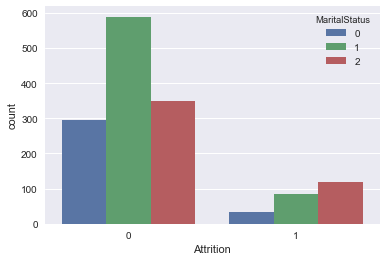

In [20]:
# Attrition vs MaritalStatus
sns.countplot(x="Attrition",data=attrition,hue="MaritalStatus")

# 'MaritalStatus': [('Divorced', 0), ('Married', 1), ('Single', 2)]

# Attrition : 0 - No ; 1- Yes

###### By the above plot, we can infer that Employees who are Single tends to change the company than the others and Married employees tends to stay in the company itself.

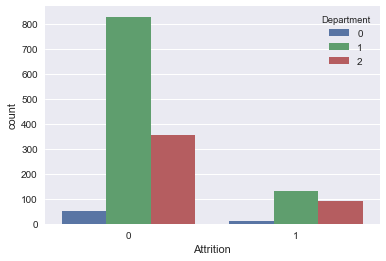

In [21]:
# Attrition vs Department
sns.countplot(x="Attrition",data=attrition,hue="Department")

# 'Department': [('Human Resources', 0),('Research & Development', 1),('Sales', 2)]

# Attrition : 0 - No ; 1- Yes

###### By the above plot, we can infer that  the ratio between Employees in R&D dept not trying to change the company and trying to change the company is Large. So, the probability of Employees from R&D department will try to change the company is very less..

## Unsupervised Learning

#### Let's separate only the Indpendent features for UNSUPERVISED LEARNING

In [22]:
X = attrition.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber","Attrition"],axis=1)

Y = attrition["Attrition"]

#### Find the new "Y" (Target) and accuracy scores with K-Means Clustering:

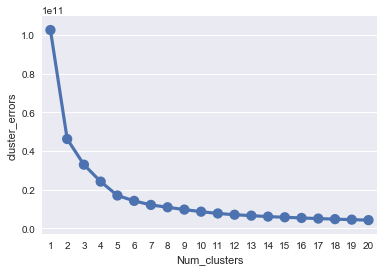

In [23]:
# Kmeans iteration 1 till 20 cluster size

cluster_errors = []

for i in range(1,21):
    clusters = KMeans(i)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)
    

# WSS values

clusters_df = pd.DataFrame({"Num_clusters":range(1,21),"cluster_errors":cluster_errors})

# WSS values vs Number of Clusters (Elbow graph)

sns.pointplot(x=clusters_df.Num_clusters,y=clusters_df.cluster_errors,data=clusters_df)
plt.show()

###### For Unscaled data , By the Elbow graph, we can see that the numeber of clusters can be of either 2 or three. We can consider 2 as cluster size approximately.

In [24]:
# Fit the data and check the accuracy score

kmean = KMeans(n_clusters=2).fit(X)

y_kmean = list(kmean.labels_)

kmean_met = metrics.accuracy_score(Y,y_kmean)
kmean_met

0.5081632653061224

#### Find the new "Y" (Target) and Accuracy score with Hierarchial Clustering :

In [25]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage="ward")

y_hier = list(cluster.fit_predict(X))

hier_met = metrics.accuracy_score(Y,y_hier)
hier_met 

0.5585034013605442

#### Comaparing the accuracy between K-Means and Hierarchial Clustering :

In [26]:
compr = pd.DataFrame({"Accuracy_Scores":[kmean_met,hier_met]},index=["kmean_cluster","Agglomerative_cluster"])
compr.sort_values(by="Accuracy_Scores",ascending=False)

,Accuracy_Scores
Agglomerative_cluster,0.558503
kmean_cluster,0.508163


###### By the above comparison we can see that, Hierarchial clustering prediction gives better accuracy than the K-Means clustering. Hence, we can proceed with the new "Target" variable as we got in Hierarchial clustering.

### Unsupervised Learning-PCA without Scaling

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_hier,test_size=0.3, random_state=0)  

In [28]:
#PCA for all the features

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [29]:
# Loading Score
print("Loading Scores are:\n",pca.explained_variance_ratio_ )

Loading Scores are:
 [7.22954023e-01 2.74683849e-01 2.35269096e-03 5.93252867e-06
 1.05664003e-06 9.25776718e-07 6.49782853e-07 1.91686639e-07
 1.64352090e-07 8.79117151e-08 8.47392017e-08 7.26999146e-08
 5.80551352e-08 5.29244784e-08 2.63719793e-08 2.13296116e-08
 1.73822405e-08 1.67813351e-08 1.57380391e-08 1.44285849e-08
 1.33184726e-08 7.32789904e-09 6.96649992e-09 6.22157201e-09
 3.34249644e-09 2.83207144e-09 2.70281335e-09 2.30471303e-09
 1.47281158e-09 7.25267978e-10]


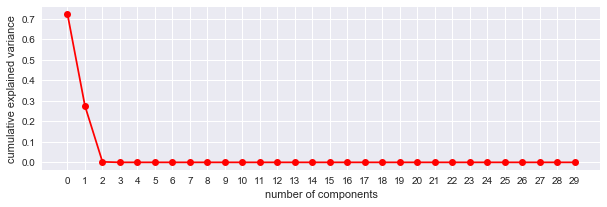

In [30]:
#Explained variance vs Number of components plot

plt.figure(figsize=(10,3))
plt.plot(pca.explained_variance_ratio_,marker="o",c="r")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(30))
plt.show()

#### By the above graph, we can approximately consider upto PC2 components

### Train and test the models

In [31]:
# Random Forest model
random_us = RandomForestClassifier()  
random_us.fit(X_train, y_train)

y_random_unscaled = random_us.predict(X_test) 
y_random_met=metrics.accuracy_score(y_test,y_random_unscaled)

print("Accuracy for y_random_met:\n",y_random_met)

Accuracy for y_random_met:
 0.9342403628117913


In [32]:
# Logistic Regression model

log_model_us = LogisticRegression()  
log_model_us.fit(X_train, y_train)

log_model_unscaled = log_model_us.predict(X_test) 
y_log_model_met=metrics.accuracy_score(y_test,log_model_unscaled)

print("Accuracy for y_log_model_met:\n",y_log_model_met)

Accuracy for y_log_model_met:
 0.9160997732426304


In [33]:
# Decision Tree model

tree_model_us = DecisionTreeClassifier()  
tree_model_us.fit(X_train, y_train)

tree_model_unscaled = tree_model_us.predict(X_test) 
tree_model_met=metrics.accuracy_score(y_test,tree_model_unscaled)

print("Accuracy for tree_model_met:\n",tree_model_met)

Accuracy for tree_model_met:
 0.9727891156462585


In [34]:
# KNN model

KNN_model_us = KNeighborsClassifier()  
KNN_model_us.fit(X_train, y_train)

KNN_model_unscaled = KNN_model_us.predict(X_test) 
KNN_model_met=metrics.accuracy_score(y_test,KNN_model_unscaled)

print("Accuracy for KNN_model_met:\n",KNN_model_met)

Accuracy for KNN_model_met:
 0.9909297052154195


In [35]:
# Naive model

Naive_model_us = GaussianNB()  
Naive_model_us.fit(X_train, y_train)

Naive_model_unscaled = Naive_model_us.predict(X_test) 
Naive_model_met=metrics.accuracy_score(y_test,Naive_model_unscaled)

print("Accuracy for Naive_model_met:\n",Naive_model_met)

Accuracy for Naive_model_met:
 0.9478458049886621


In [36]:
# SVM model

SVM_model_us = SVC()  
SVM_model_us.fit(X_train, y_train)

SVM_model_unscaled = SVM_model_us.predict(X_test) 
SVM_model_met=metrics.accuracy_score(y_test,SVM_model_unscaled)

print("Accuracy for SVM_model_met:\n",SVM_model_met)

Accuracy for SVM_model_met:
 0.564625850340136


In [37]:
Accuracy_Scores_2=pd.DataFrame([y_random_met,y_log_model_met,tree_model_met,
                                     KNN_model_met,Naive_model_met,SVM_model_met],columns=["Accuracy_Scores_Unscaled_USL"]
                               ,index= ["Random_met","Log_model_met","Tree_model_met",
                                     "KNN_model_met","Naive_model_met","SVM_model_met"])

Accuracy_Scores_2.sort_values(by="Accuracy_Scores_Unscaled_USL",ascending=False)

,Accuracy_Scores_Unscaled_USL
KNN_model_met,0.990930
Tree_model_met,0.972789
Naive_model_met,0.947846
Random_met,0.934240
Log_model_met,0.916100
SVM_model_met,0.564626


##### By looking the above dataframe, we can see that KNN performs better than other models in unscaled data..

### Unsupervised Learning-PCA with Scaling

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_std = preprocessing.StandardScaler().fit_transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_std,y_hier,test_size=0.3, random_state=0)  


In [39]:
#PCA for all the features

pca2 = PCA()  
X_train1 = pca2.fit_transform(X_train1)  
X_test2 = pca2.transform(X_test1)  

# Loading Score
print("Loading Scores are:\n",pca2.explained_variance_ratio_ )


Loading Scores are:
 [0.15805916 0.06397741 0.06211961 0.0564789  0.05140754 0.03995689
 0.03977098 0.03895749 0.0363926  0.03544472 0.03377148 0.03315486
 0.03249319 0.03168924 0.0311941  0.03046942 0.03013646 0.02919057
 0.02793495 0.02696339 0.02389566 0.01788897 0.01662695 0.0108773
 0.01070111 0.00997773 0.00743695 0.00687017 0.00442217 0.00174003]


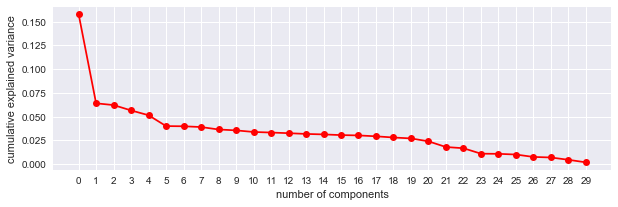

In [40]:
#Explained variance vs Number of components plot

plt.figure(figsize=(10,3))
plt.plot(pca2.explained_variance_ratio_,marker="o",c="r")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(30))
plt.show()


#### By the above graph, we can approximately consider upto PC2 components

### Train and test the models


In [41]:
# Random Forest model
random_sv = RandomForestClassifier()  
random_sv.fit(X_train1, y_train1)

y_random_scaled = random_sv.predict(X_test1) 
y_random_scaled_met=metrics.accuracy_score(y_test1,y_random_scaled)

print("Accuracy for y_random_scaled_met:\n",y_random_scaled_met)

Accuracy for y_random_scaled_met:
 0.46938775510204084


In [42]:
# Logistic Regression model

log_model_sv = LogisticRegression()  
log_model_sv.fit(X_train1, y_train1)

log_model_scaled = log_model_sv.predict(X_test1) 
y_log_model_scaled_met=metrics.accuracy_score(y_test1,log_model_scaled)

print("Accuracy for y_log_model_scaled_met:\n",y_log_model_scaled_met)


Accuracy for y_log_model_scaled_met:
 0.38095238095238093


In [43]:
# Decision Tree model

tree_model_sv = DecisionTreeClassifier()  
tree_model_sv.fit(X_train1, y_train1)

tree_model_scaled = tree_model_sv.predict(X_test1) 
tree_model_scaled_met=metrics.accuracy_score(y_test1,tree_model_scaled)

print("Accuracy for tree_model_scaled_met:\n",tree_model_scaled_met)

Accuracy for tree_model_scaled_met:
 0.48072562358276644


In [44]:
# KNN model

KNN_model_sv = KNeighborsClassifier()  
KNN_model_sv.fit(X_train1, y_train1)

KNN_model_scaled = KNN_model_sv.predict(X_test1) 
KNN_model_scaled_met=metrics.accuracy_score(y_test1,KNN_model_scaled)

print("Accuracy for KNN_model_scaled_met:\n",KNN_model_scaled_met)


Accuracy for KNN_model_scaled_met:
 0.4671201814058957


In [45]:
# Naive model

Naive_model_sv = GaussianNB()  
Naive_model_sv.fit(X_train1, y_train1)

Naive_model_scaled = Naive_model_sv.predict(X_test1) 
Naive_model_scaled_met=metrics.accuracy_score(y_test1,Naive_model_scaled)

print("Accuracy for Naive_model_scaled_met:\n",Naive_model_scaled_met)


Accuracy for Naive_model_scaled_met:
 0.38095238095238093


In [46]:
# SVM model

SVM_model_sv = SVC()  
SVM_model_sv.fit(X_train1, y_train1)

SVM_model_scaled = SVM_model_sv.predict(X_test1) 
SVM_model_scaled_met=metrics.accuracy_score(y_test1,SVM_model_scaled)

print("Accuracy for SVM_model_scaled_met:\n",SVM_model_scaled_met)


Accuracy for SVM_model_scaled_met:
 0.3922902494331066


In [47]:
Accuracy_Scores_3=pd.DataFrame([y_random_scaled_met,y_log_model_scaled_met,tree_model_scaled_met,
                                     KNN_model_scaled_met,Naive_model_scaled_met,SVM_model_scaled_met],columns=["Accuracy_Scores_scaled_USL"]
                               ,index= ["Random_scaled_met","Log_model_scaled_met","Tree_model_scaled_met",
                                     "KNN_model_scaled_met","Naive_model_scaled_met","SVM_model_scaled_met"])

Accuracy_Scores_3.sort_values(by="Accuracy_Scores_scaled_USL",ascending=False)


,Accuracy_Scores_scaled_USL
Tree_model_scaled_met,0.480726
Random_scaled_met,0.469388
KNN_model_scaled_met,0.467120
SVM_model_scaled_met,0.392290
Log_model_scaled_met,0.380952
Naive_model_scaled_met,0.380952


# Supervised Learning

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.3, random_state=0)  


### Train and test the models


In [49]:
# Random Forest model
random_sup = RandomForestClassifier()  
random_sup.fit(X_train2, y_train2)

y_random_sup = random_sup.predict(X_test2) 
y_random_sup_met=metrics.accuracy_score(y_test2,y_random_sup)

print("Accuracy for y_random_sup_met:\n",y_random_sup_met)

Accuracy for y_random_sup_met:
 0.8480725623582767


In [50]:
# Logistic Regression model

log_model_sup = LogisticRegression()  
log_model_sup.fit(X_train2, y_train2)

y_log_model_sup = log_model_sup.predict(X_test2) 
y_log_model_sup_met=metrics.accuracy_score(y_test2,y_log_model_sup)

print("Accuracy for y_log_model_sup_met:\n",y_log_model_sup_met)

Accuracy for y_log_model_sup_met:
 0.873015873015873


In [51]:
# Decision tree model

tree_model_sup = DecisionTreeClassifier()  
tree_model_sup.fit(X_train2, y_train2)

y_tree_model_sup = tree_model_sup.predict(X_test2) 
y_tree_model_sup_met=metrics.accuracy_score(y_test2,y_tree_model_sup)

print("Accuracy for tree_model_scaled_met:\n",y_tree_model_sup_met)

Accuracy for tree_model_scaled_met:
 0.7755102040816326


In [52]:
# KNN model

KNN_model_sup = KNeighborsClassifier()  
KNN_model_sup.fit(X_train2, y_train2)

y_KNN_model_sup = KNN_model_sup.predict(X_test2) 
y_KNN_model_sup_met=metrics.accuracy_score(y_test2,y_KNN_model_sup)

print("Accuracy for KNN_model_scaled_met:\n",y_KNN_model_sup_met)



Accuracy for KNN_model_scaled_met:
 0.8163265306122449


In [53]:
# Naives model

Naives_model_sup = GaussianNB()  
Naives_model_sup.fit(X_train2, y_train2)

y_Naives_model_sup = Naives_model_sup.predict(X_test2) 
y_Naives_model_sup_met=metrics.accuracy_score(y_test2,y_Naives_model_sup)

print("Accuracy for Naives_model_scaled_met:\n",y_Naives_model_sup_met)


Accuracy for Naives_model_scaled_met:
 0.7981859410430839


In [54]:
# SVM model

SVM_model_sup = SVC()  
SVM_model_sup.fit(X_train2, y_train2)

y_SVM_model_sup = SVM_model_sup.predict(X_test2) 
y_SVM_model_sup_met=metrics.accuracy_score(y_test2,y_SVM_model_sup)

print("Accuracy for SVM_model_scaled_met:\n",y_SVM_model_sup_met)

Accuracy for SVM_model_scaled_met:
 0.8412698412698413


In [55]:
Accuracy_Scores_4=pd.DataFrame([y_random_sup_met,y_log_model_sup_met,y_tree_model_sup_met,
                                     y_KNN_model_sup_met,y_Naives_model_sup_met,y_SVM_model_sup_met],columns=["Accuracy_Scores_SL"]
                               ,index= ["Random_sup_met","Log_model_sup_met","Tree_model_sup_met",
                                     "KNN_model_sup_met","Naives_model_sup_met","SVM_model_sup_met"])
Accuracy_Scores_4.sort_values(by="Accuracy_Scores_SL",ascending=False)


,Accuracy_Scores_SL
Log_model_sup_met,0.873016
Random_sup_met,0.848073
SVM_model_sup_met,0.841270
KNN_model_sup_met,0.816327
Naives_model_sup_met,0.798186
Tree_model_sup_met,0.775510


In [56]:
Accuracy_Scores_4["Accuracy_Scores_SL"]

Random_sup_met          0.848073
Log_model_sup_met       0.873016
Tree_model_sup_met      0.775510
KNN_model_sup_met       0.816327
Naives_model_sup_met    0.798186
SVM_model_sup_met       0.841270
Name: Accuracy_Scores_SL, dtype: float64

##### By referring the above dataframe, For Supervised Learning, Random Forest model accuracy score is good when compared to other model scores

## Models Comparision

In [57]:
Mod_Compr=pd.DataFrame({"Unsupervised_PCA_Unscaled":Accuracy_Scores_2["Accuracy_Scores_Unscaled_USL"].values,
             "Unsupervised_PCA_Scaled":Accuracy_Scores_3["Accuracy_Scores_scaled_USL"].values,
             "Supervised_Unscaled":Accuracy_Scores_4["Accuracy_Scores_SL"].values},
            index=["Random_Model","Log_Model","Tree_Model","KNN_Model","Naive_Bayes_Model",
                  "SVM_Model"])

Mod_Compr

,Unsupervised_PCA_Unscaled,Unsupervised_PCA_Scaled,Supervised_Unscaled
Random_Model,0.934240,0.469388,0.848073
Log_Model,0.916100,0.380952,0.873016
Tree_Model,0.972789,0.480726,0.775510
KNN_Model,0.990930,0.467120,0.816327
Naive_Bayes_Model,0.947846,0.380952,0.798186
SVM_Model,0.564626,0.392290,0.841270


## As per the above results based on model accuracy, we can say the below things:

### 1) Unsupervised_PCA_Unscaled data(Random Forest) is giving good accuracy..

### 2) Scaled data is performing poor in Unsupervised Learning when compared to Unscaled data..

### 3) Scaled PCA in Unsupervised model is giving poor predictions out of all..


## So, For this dataset, Unsupervised Learning with the Agglomerative clustering predictor predicts better when it is trained with the unscaled data in Random Forest model.